# Tirgul 5

## Topics
* Standard error vs. Standard deviation
* Boostrapping
* Confidence Intervals
* The scipy.stats library

## Standard error vs. standard deviation

In [1]:
import numpy as np
import seaborn as sns
sns.set_theme(style="whitegrid")

Let's define a "population" of size 1,000,000. Each member of the population will be a number from the standard normal distribution. We will be using the [numpy function](https://numpy.org/doc/stable/reference/random/generated/numpy.random.randn.html) `randn`

In [2]:
population = np.random.randn(1000000)

In [3]:
population

array([-0.03930927,  1.12093417,  1.4711188 , ...,  0.87298055,
       -1.41287774, -0.45158761])

What's the population's mean and standard deviation?


In [4]:
mean_value = population.mean()
std = population.std()
print(f"The mean value is {mean_value} and the standard deviation is {std}")

The mean value is 0.0005550206598081666 and the standard deviation is 1.0005398759164732


What does the distribution of the population look like?


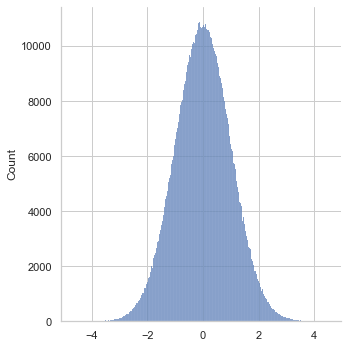

In [5]:
sns.displot(population)

If this were the real world, sampling 1,000,000 people would be difficult. Let's say that our budget allowed us to sample only 100 people at a time. How can we simulate that?

In [6]:
sample_size = 100
sample_100 = np.random.choice(population, sample_size)

What's the sample's mean and standard deviation?


In [7]:
mean_100 = sample_100.mean()
std_100 = sample_100.std()
print(f"The mean value is {mean_100} and the standard deviation is {std_100}")

The mean value is 0.031818648385510205 and the standard deviation is 1.08690669372051


Notice that our sample's mean value is pretty different from that of the population. What if we take a bigger sample size?

In [8]:
sample_size = 1000
sample_1000 = np.random.choice(population, sample_size)
mean_1000 = sample_1000.mean()
std_1000 = sample_1000.std()
print(f"The mean value is {mean_1000} and the standard deviation is {std_1000}")

The mean value is 0.022688460423204874 and the standard deviation is 0.9901872943449314


Or smaller...

In [9]:
sample_size = 5
sample_5 = np.random.choice(population, sample_size)
mean_5 = sample_5.mean()
std_5 = sample_5.std()
print(f"The mean value is {mean_5} and the standard deviation is {std_5}")

The mean value is 0.02165287037887561 and the standard deviation is 0.47464743385275177


The standard error of the mean ($SE$) measures the precision of the estimate of the sample mean. We can use the formula $SE = \sigma/\sqrt n$.

* $\sigma$ = the standard deviation of the sample
* $n$ = the sample size

Now we can compare our standard errors using the different sample sizes.


In [10]:
se_5 = std_5/np.sqrt(5)
se_100 = std_100/np.sqrt(100)
se_1000 = std_1000/np.sqrt(1000)

print(f"The standard error of the mean when the sample size was 5 was {se_5}")
print(f"The standard error of the mean when the sample size was 100 was {se_100}")
print(f"The standard error of the mean when the sample size was 1000 was {se_1000}")

The standard error of the mean when the sample size was 5 was 0.21226878548811756
The standard error of the mean when the sample size was 100 was 0.108690669372051
The standard error of the mean when the sample size was 1000 was 0.03131247160289548


# Bootstrapping

From Wikipedia:

The basic idea of bootstrapping is that inference about a population from sample data (sample → population) can be modelled by resampling the sample data and performing inference about a sample from resampled data (resampled → sample). As the population is unknown, the true error in a sample statistic against its population value is unknown. In bootstrap-resamples, the 'population' is in fact the sample, and this is known; hence the quality of inference of the 'true' sample from resampled data (resampled → sample) is measurable.

More formally, the bootstrap works by treating inference of the true probability distribution J, given the original data, as being analogous to inference of the empirical distribution Ĵ, given the resampled data. The accuracy of inferences regarding Ĵ using the resampled data can be assessed because we know Ĵ. If Ĵ is a reasonable approximation to J, then the quality of inference on J can in turn be inferred.

As an example, assume we are interested in the average (or mean) height of people worldwide. We cannot measure all the people in the global population, so instead we sample only a tiny part of it, and measure that. Assume the sample is of size N; that is, we measure the heights of N individuals. From that single sample, only one estimate of the mean can be obtained. In order to reason about the population, we need some sense of the variability of the mean that we have computed. The simplest bootstrap method involves taking the original data set of heights, and, using a computer, sampling from it to form a new sample (called a 'resample' or bootstrap sample) that is also of size N. The bootstrap sample is taken from the original by using sampling with replacement (e.g. we might 'resample' 5 times from [1,2,3,4,5] and get [2,5,4,4,1]), so, assuming N is sufficiently large, for all practical purposes there is virtually zero probability that it will be identical to the original "real" sample. This process is repeated a large number of times (typically 1,000 or 10,000 times), and for each of these bootstrap samples we compute its mean (each of these are called bootstrap estimates). We now can create a histogram of bootstrap means. This histogram provides an estimate of the shape of the distribution of the sample mean from which we can answer questions about how much the mean varies across samples. (The method here, described for the mean, can be applied to almost any other statistic or estimator.)

Let's create a numpy array to represent heights of female students at the Faculta


In [11]:
np.random.seed(42)
mean = 162.2
std = 5.5
sample_size = 1000
heights = np.random.normal(loc=mean, 
                           scale=std, 
                           size=sample_size)

# sample mean
mean_value = heights.mean()

# population standard deviation
std = heights.std()

print(f"The population's mean value is {mean_value} and the standard deviation is {std}")


The population's mean value is 162.30632630702277 and the standard deviation is 5.382994142610448


Now we can construct a simulated sampling distribution

In [12]:
boot_straps = 1000
sample_means = np.zeros(boot_straps)
for ii in range(boot_straps):
    sample = np.random.choice(heights, 
                              size=sample_size,
                              replace=True)
    sample_means[ii]= sample.mean()

In [13]:
# now we can find the standard deviation of the means
se_mean_height_bootstrap = sample_means.std()
print(f"The standard error of the mean calculated using bootstrapping is: {se_mean_height_bootstrap:.3f}")

The standard error of the mean calculated using bootstrapping is: 0.171


For the mean, it is also possible to estimate the SE of the mean by dividing the STD of the *values* by by the sqrt of the sample size. (see below).  
For other statistics, such as the median, there is no such analyitical formula. The utility of the bootstrap is in estimating the SE of these other statistics.

In [14]:
se_mean_height_analytical = heights.std()/np.sqrt(sample_size)
print(f"The standard error of the mean calculated using the analytical formula is: {se_mean_height_analytical:.3f}")

The standard error of the mean calculated using the analytical formula is: 0.170


## Confidence Intervals

We can also compute the confidence interval for our estimate of the mean. Let's say we want the 90 percent confidence interval.


In [15]:
conf_level = 0.9
low_bound = (1-conf_level)/2
up_bound = (1+conf_level)/2
CI = (np.quantile(sample_means, low_bound),
      np.quantile(sample_means, up_bound)) 

In [16]:
print(f"The lower bound of the confidence interval is: {CI[0]}")
print(f"The upper bound of the confidence interval is: {CI[1]}")

The lower bound of the confidence interval is: 162.0416357693033
The upper bound of the confidence interval is: 162.6010277719378


### The scipy.stats library

Hint: This library was useful for last year's homework

In [17]:
# import the library
import scipy.stats

Make a distribution with mean 0 and standard deviation 1. 
Note: location (loc) keyword specifies the mean; scale (scale) keyword specifies the standard deviation.

In [18]:
scipy.stats.norm(loc=0, scale=1)

The function also has methods, such as the pdf (probability density function)


In [19]:
scipy.stats.norm(0, 1).pdf(0)

0.3989422804014327

cdf (cumulative distribution function)

In [20]:
# and cdf
scipy.stats.norm(0, 1).cdf(0)

0.5

## Can you bootsrap confidence interval for the median?